In [2]:
import pandas as pd
import seaborn
#import keras
import sklearn
import numpy as np
import seaborn as sns
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
log = pd.read_excel('data.xlsx')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
log.head(20)

,Глубина,Обороты ротора\СВП,Общий объём ёмкостей,Вес на крюке (сред),Давление на входе,Расход на выходе,Вес бурильной колонны или инструмента,Крутящий момент на роторе (макс),Плотность на входе,Нагрузка на долото,Скорость проходки
0,9.200,5.396,77.834,136865.005,461787.516,0.028,147099.750,0.852,1180.000,10926.558,0.009
1,9.600,5.444,77.342,136865.005,473435.810,0.028,147099.750,0.782,1180.000,10848.980,0.021
2,10.000,5.424,77.346,136865.005,469338.701,0.031,147099.750,0.826,1180.000,9297.420,0.110
3,10.400,5.421,76.973,136865.005,453809.415,0.031,147099.750,0.826,1180.000,13176.318,0.047
4,10.800,5.353,76.919,136865.005,451864.184,0.031,147099.750,0.826,1180.000,8909.530,0.035
5,11.200,5.466,76.847,136865.005,445700.331,0.031,147099.750,0.828,1180.000,15891.547,0.040
6,11.600,5.428,76.336,136865.005,463404.250,0.031,147099.750,0.794,1180.000,12555.695,0.013
7,12.000,5.427,76.145,136865.005,436801.722,0.031,147099.750,0.794,1180.000,10073.200,0.147
8,12.800,5.388,76.241,136865.005,459195.147,0.031,147099.750,0.806,1180.000,9685.310,0.331
9,13.200,5.416,76.753,136865.005,429646.483,0.031,147099.750,0.779,1180.000,9685.310,0.019


In [6]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Глубина                                5584 non-null   float64
 1   Обороты ротора\СВП                     5584 non-null   float64
 2   Общий объём ёмкостей                   5584 non-null   float64
 3   Вес на крюке (сред)                    5584 non-null   float64
 4   Давление на входе                      5584 non-null   float64
 5   Расход на выходе                       5584 non-null   float64
 6   Вес бурильной колонны или инструмента  5584 non-null   float64
 7   Крутящий момент на роторе (макс)       5584 non-null   float64
 8   Плотность на входе                     5584 non-null   float64
 9   Нагрузка на долото                     5584 non-null   float64
 10  Скорость проходки                      5584 non-null   float64
dtypes: f

In [7]:
log = log[log['Нагрузка на долото']!=0]
log['Давление на входе'] = log['Давление на входе']/10**3
log['Обороты ротора\СВП'] =log['Обороты ротора\СВП']*5
log['Скорость проходки'] =log['Скорость проходки']*60*60

In [8]:
log.describe()

,Глубина,Обороты ротора\СВП,Общий объём ёмкостей,Вес на крюке (сред),Давление на входе,Расход на выходе,Вес бурильной колонны или инструмента,Крутящий момент на роторе (макс),Плотность на входе,Нагрузка на долото,Скорость проходки
count,5584.000,5584.000,5584.000,5584.000,5584.000,5584.000,5584.000,5584.000,5584.000,5584.000,5584.000
mean,1404.432,48.613,93.092,272706.089,12433.683,0.029,338176.635,7.645,1151.823,49836.217,69.936
std,767.552,17.864,16.694,71626.356,3209.940,0.016,79206.758,2.971,70.604,30905.845,62.649
min,9.200,0.000,60.838,136865.005,409.198,0.016,140235.097,0.000,1070.000,188.972,2.261
25%,771.500,31.318,79.650,248388.546,10756.514,0.018,279489.525,5.890,1110.000,27479.507,41.805
50%,1492.600,61.866,90.615,248388.546,12677.180,0.018,313812.800,7.307,1120.000,42568.419,58.528
75%,2056.500,62.120,101.077,248388.546,14667.451,0.038,402072.650,9.514,1180.000,65066.031,75.597
max,2620.000,62.647,153.894,421377.322,17383.646,0.064,490332.500,16.604,1300.000,334719.081,1664.544


In [9]:
from scipy.stats import kurtosis
from scipy.stats import skew
print(log.kurtosis())
print(log.skew())

Глубина                                  -1.124
Обороты ротора\СВП                       -0.265
Общий объём ёмкостей                      0.582
Вес на крюке (сред)                       0.660
Давление на входе                         3.659
Расход на выходе                         -0.272
Вес бурильной колонны или инструмента    -0.564
Крутящий момент на роторе (макс)          0.183
Плотность на входе                       -0.371
Нагрузка на долото                        3.907
Скорость проходки                       167.530
dtype: float64
Глубина                                 -0.256
Обороты ротора\СВП                      -0.940
Общий объём ёмкостей                     1.022
Вес на крюке (сред)                      1.163
Давление на входе                       -1.553
Расход на выходе                         1.087
Вес бурильной колонны или инструмента    0.089
Крутящий момент на роторе (макс)         0.078
Плотность на входе                       1.059
Нагрузка на долото                

In [10]:
log.corr()

,Глубина,Обороты ротора\СВП,Общий объём ёмкостей,Вес на крюке (сред),Давление на входе,Расход на выходе,Вес бурильной колонны или инструмента,Крутящий момент на роторе (макс),Плотность на входе,Нагрузка на долото,Скорость проходки
Глубина,1.000,0.759,-0.495,-0.115,0.792,-0.854,0.288,0.715,-0.545,-0.306,-0.431
Обороты ротора\СВП,0.759,1.000,-0.611,-0.509,0.361,-0.785,-0.246,0.509,-0.775,-0.465,-0.334
Общий объём ёмкостей,-0.495,-0.611,1.000,0.359,-0.198,0.503,0.291,-0.263,0.565,0.232,0.192
Вес на крюке (сред),-0.115,-0.509,0.359,1.000,0.279,0.124,0.805,-0.109,0.749,0.463,-0.217
Давление на входе,0.792,0.361,-0.198,0.279,1.000,-0.500,0.614,0.694,-0.191,0.060,-0.296
Расход на выходе,-0.854,-0.785,0.503,0.124,-0.500,1.000,-0.058,-0.378,0.563,0.357,0.492
Вес бурильной колонны или инструмента,0.288,-0.246,0.291,0.805,0.614,-0.058,1.000,0.351,0.551,0.321,-0.289
Крутящий момент на роторе (макс),0.715,0.509,-0.263,-0.109,0.694,-0.378,0.351,1.000,-0.332,-0.082,-0.167
Плотность на входе,-0.545,-0.775,0.565,0.749,-0.191,0.563,0.551,-0.332,1.000,0.413,0.059
Нагрузка на долото,-0.306,-0.465,0.232,0.463,0.060,0.357,0.321,-0.082,0.413,1.000,0.070


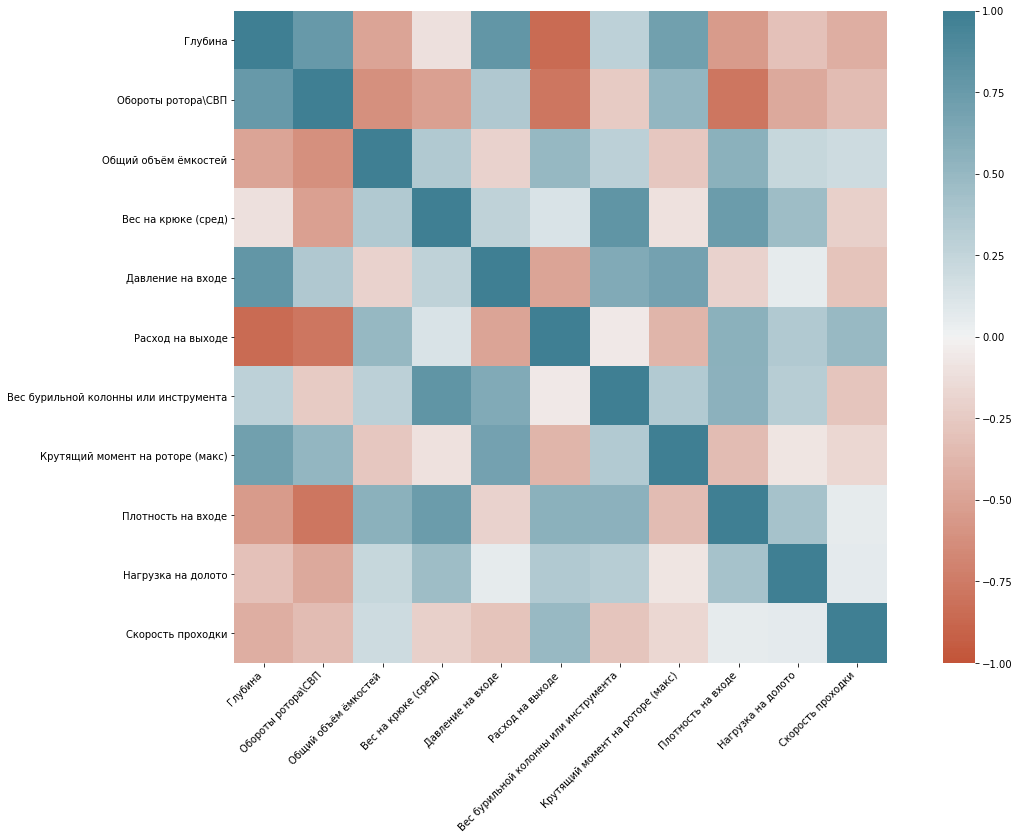

In [11]:
def CorrMatrix(dataset):
    
    corr = dataset.corr()
    x = plt.figure(figsize=(20,12))
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200, ),
    square=True, 
 )
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
 );
    

    
CorrMatrix(log)
 

In [12]:
log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5584 entries, 0 to 5583
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Глубина                                5584 non-null   float64
 1   Обороты ротора\СВП                     5584 non-null   float64
 2   Общий объём ёмкостей                   5584 non-null   float64
 3   Вес на крюке (сред)                    5584 non-null   float64
 4   Давление на входе                      5584 non-null   float64
 5   Расход на выходе                       5584 non-null   float64
 6   Вес бурильной колонны или инструмента  5584 non-null   float64
 7   Крутящий момент на роторе (макс)       5584 non-null   float64
 8   Плотность на входе                     5584 non-null   float64
 9   Нагрузка на долото                     5584 non-null   float64
 10  Скорость проходки                      5584 non-null   float64
dtypes: f

In [13]:
def savgol_filter(data,window_length,polynom_degree):
    x = scipy.signal.savgol_filter(data, window_length, polynom_degree)
    return x

ROP = savgol_filter(log['Скорость проходки'], 51, 3)
WOB = savgol_filter(log['Нагрузка на долото'], 51, 3)
WOB = savgol_filter(log['Обороты ротора\СВП'], 51, 3)
Hookload = savgol_filter(log['Вес на крюке (сред)'], 51, 3)
Deliverypressure = savgol_filter(log['Давление на входе'], 51, 3)
Flowout =savgol_filter(log['Расход на выходе'], 51, 3)
Weight_drill_string = savgol_filter(log['Вес бурильной колонны или инструмента'], 51, 3)
mud_barrels = savgol_filter(log['Общий объём ёмкостей'], 51, 3)
torque = savgol_filter(log['Крутящий момент на роторе (макс)'], 51, 3)



In [14]:
log['Скорость проходки'] =ROP
log['WOB kH'] = WOB
log['Hookload kH'] = Hookload
log['delivery pressure'] =Deliverypressure
log['Flow out'] = Flowout
log['Weight of drill string  kg'] = Weight_drill_string
log['Torque'] = torque

In [15]:
XZ = log.drop(['Скорость проходки'],1)

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

No handles with labels found to put in legend.


Text(0.5, 0, 'm^3')

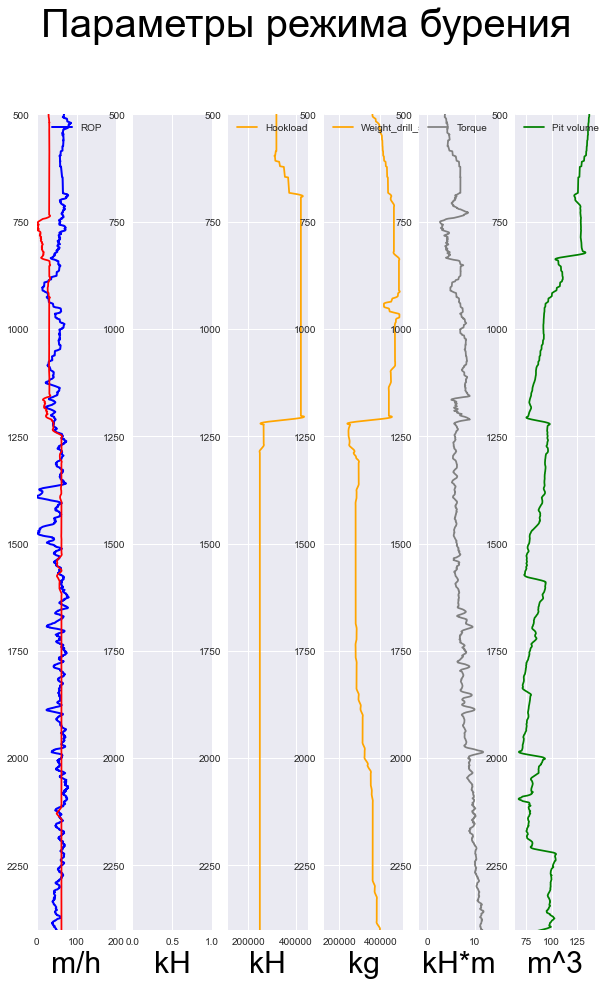

In [19]:

    
plt.style.use('seaborn')
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6,figsize=(10, 15))
fig.suptitle('Параметры режима бурения',color='black',size=40)

ax1.plot(log['Скорость проходки'],log['Глубина'], color="blue", label=r"ROP",linewidth=2,linestyle = '-')
ax1.legend(loc="upper center")
ax1.set_ylim(2400, 500)
ax1.set_xlim(0,200)
ax1.set_xlabel(r'm/h',color='black',size=30)

ax1.plot(WOB, log['Глубина'],color='red', label=r"WOB")
ax2.legend(loc="upper left")
ax2.set_ylim(2400, 500)
ax2.set_xlabel(r'kH',color='black',size=30)

ax3.plot(Hookload, log['Глубина'],color='orange', label=r"Hookload")
ax3.legend(loc="upper left")
ax3.set_ylim(2400, 500)
ax3.set_xlabel(r'kH',color='black',size=30)

ax4.plot(Weight_drill_string, log['Глубина'],color='orange', label=r"Weight_drill_string")
ax4.legend(loc="upper left")
ax4.set_ylim(2400, 500)
ax4.set_xlabel(r'kg',color='black',size=30)

ax5.plot(torque, log['Глубина'],color='grey', label=r"Torque")
ax5.legend(loc="upper left")
ax5.set_ylim(2400, 500)
ax5.set_xlabel(r'kH*m',color='black',size=30)

ax6.plot(mud_barrels, log['Глубина'],color='green', label=r"Pit volume")
ax6.legend(loc="upper left")
ax6.set_ylim(2400, 500)
ax6.set_xlabel(r'm^3',color='black',size=30)



Text(0.5, 0, 'm^3')

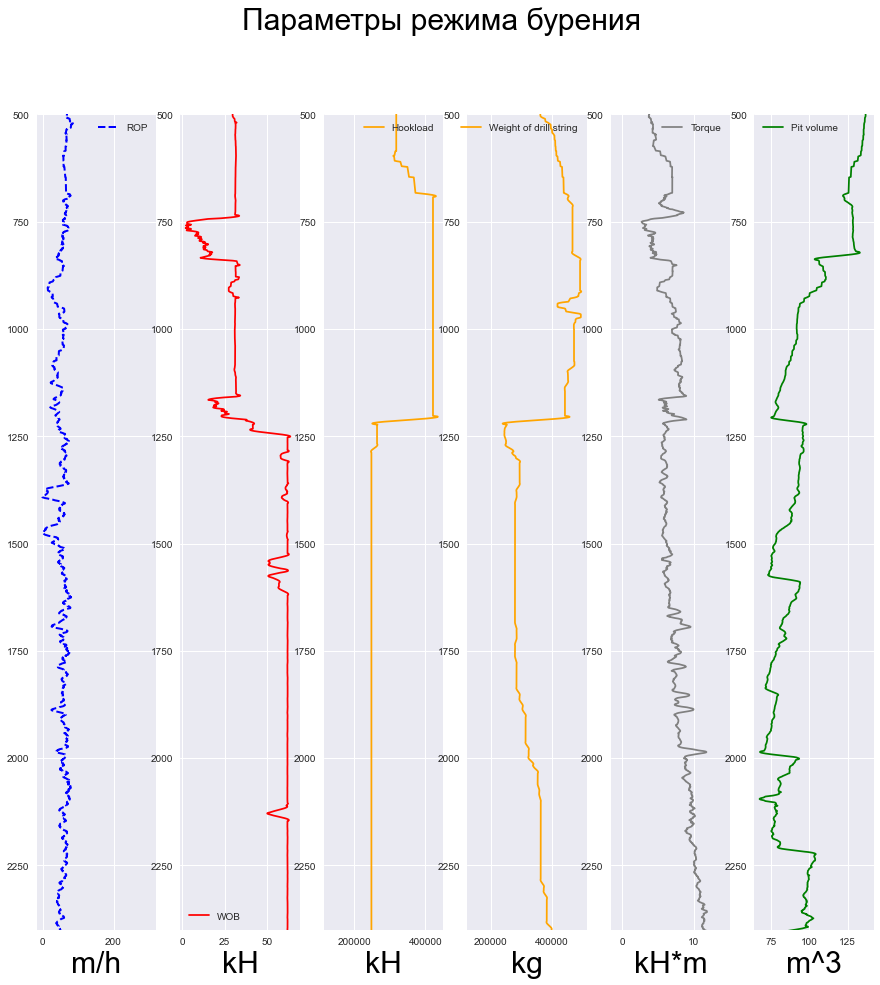

In [18]:
plt.style.use('seaborn')

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6,figsize=(15, 15))
fig.suptitle('Параметры режима бурения',color='black',size=30)

ax1.plot(ROP,log['Глубина'], color="blue", label=r"ROP",linewidth=2,linestyle = '--')
ax1.legend(loc="best")
ax1.set_ylim(2400, 500)
ax1.set_xlabel(r'm/h',color='black',size=30)

ax2.plot(WOB, log['Глубина'],color='red', label=r"WOB")
ax2.legend(loc="best")
ax2.set_ylim(2400, 500)
ax2.set_xlabel(r'kH',color='black',size=30)

ax3.plot(Hookload, log['Глубина'],color='orange', label=r"Hookload")
ax3.legend(loc="best")
ax3.set_ylim(2400, 500)
ax3.set_xlabel(r'kH',color='black',size=30)

ax4.plot(Weight_drill_string, log['Глубина'],color='orange', label=r"Weight of drill string")
ax4.legend(loc="best")
ax4.set_ylim(2400, 500)
ax4.set_xlabel(r'kg',color='black',size=30)

ax5.plot(torque, log['Глубина'],color='grey', label=r"Torque")
ax5.legend(loc="best")
ax5.set_ylim(2400, 500)
ax5.set_xlabel(r'kH*m',color='black',size=30)

ax6.plot(mud_barrels,log['Глубина'],color='green', label=r"Pit volume")
ax6.legend(loc="best")
ax6.set_ylim(2400, 500)
ax6.set_xlabel(r'm^3',color='black',size=30)


## Модель линейной регрессии

In [24]:
from sklearn import linear_model
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XZ, ROP , train_size = 0.7, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
from sklearn.preprocessing import RobustScaler
rb =RobustScaler()
sc = MinMaxScaler()
z = sc.fit_transform(XZ)
robust_data = rb.fit_transform(XZ)
print(z)

(3908, 16) (1676, 16) (3908,) (1676,)
[[0.00000000e+00 4.30643535e-01 1.82640597e-01 ... 2.88107410e-01
  1.20439311e-02 1.03564661e-01]
 [1.53209744e-04 4.34491737e-01 1.77351124e-01 ... 2.93208092e-01
  1.30625647e-02 1.05472755e-01]
 [3.06419488e-04 4.32893256e-01 1.77390232e-01 ... 2.97909142e-01
  1.39525161e-02 1.07257638e-01]
 ...
 [9.99693581e-01 9.91119528e-01 2.48605370e-01 ... 3.88287760e-02
  7.93979515e-01 9.59926587e-01]
 [9.99846790e-01 9.94671730e-01 2.58089627e-01 ... 3.86718813e-02
  7.93979515e-01 9.57232137e-01]
 [1.00000000e+00 9.86264911e-01 2.60670577e-01 ... 3.84841716e-02
  7.93979515e-01 9.53949374e-01]]


In [25]:
regr = linear_model.LinearRegression()
regr.fit(XZ, ROP)
y_pred = regr.predict(x_test)

In [26]:
y_pred.shape

(1676,)

In [27]:
log.shape

(5584, 17)

In [28]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-3.65939282e-02 -3.34107551e-01 -7.31363060e-02 -1.07694996e-04
  1.72637373e-03 -1.72126571e+02  1.90096669e-04  1.21183858e+00
 -5.87542071e-02 -2.37688463e-04 -1.53063049e+00 -2.27112426e-04
  5.63986688e-03  4.02869077e+02 -3.33668450e-04  1.65997894e+00]


In [29]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
print('Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('r2: %.2f'
      % r2_score(y_test, y_pred))
print(y_pred.shape)

Mean squared error: 12.59
r2: 0.00
(1676,)


In [30]:
depth = log.iloc[3908:,0]
yh1 = ROP[3908:]
print(yh1.shape,depth.shape)

(1676,) (1676,)


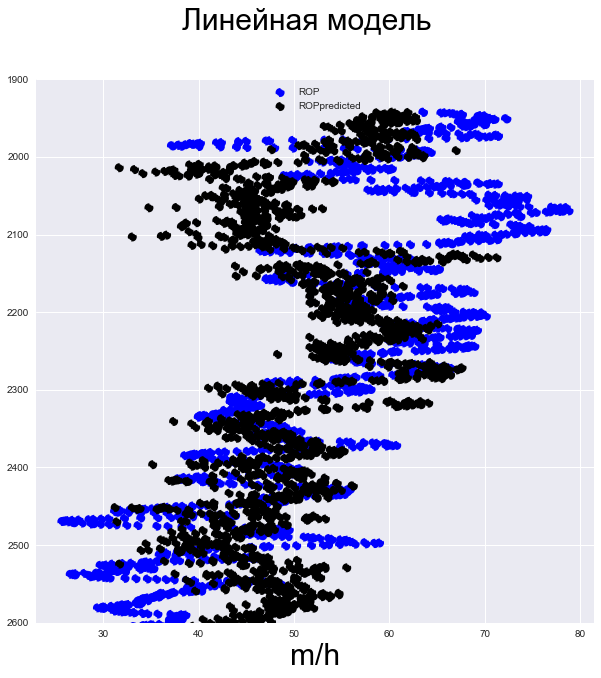

In [31]:
fig, (ax1) = plt.subplots(1,1,figsize=(10, 10))
fig.suptitle('Линейная модель',color='black',size=30)
ax1.scatter(yh1,depth, color="blue", label=r"ROP",linewidth=2,linestyle = '--')
ax1.legend(loc="upper center")
ax1.set_ylim(2600,1900)
ax1.set_xlabel(r'm/h',color='black',size=30)
ax1.scatter(y_pred,depth, color="black", label=r"ROPpredicted",linewidth=2,linestyle = '--')
ax1.legend(loc="upper center")


## Экстремальный гридентный бустинг (XBGboost)

In [32]:
log.head(10)

,Глубина,Обороты ротора\СВП,Общий объём ёмкостей,Вес на крюке (сред),Давление на входе,Расход на выходе,Вес бурильной колонны или инструмента,Крутящий момент на роторе (макс),Плотность на входе,Нагрузка на долото,Скорость проходки,WOB kH,Hookload kH,delivery pressure,Flow out,Weight of drill string kg,Torque
0,9.200,26.979,77.834,136865.005,461.788,0.028,147099.750,0.852,1180.000,10926.558,245.138,27.093,136865.006,469.744,0.029,146047.969,0.695
1,9.600,27.220,77.342,136865.005,473.436,0.028,147099.750,0.782,1180.000,10848.980,241.846,27.089,136865.006,465.592,0.030,146407.045,0.724
2,10.000,27.120,77.346,136865.005,469.339,0.031,147099.750,0.826,1180.000,9297.420,237.526,27.086,136865.006,461.785,0.030,146720.759,0.751
3,10.400,27.105,76.973,136865.005,453.809,0.031,147099.750,0.826,1180.000,13176.318,232.273,27.082,136865.006,458.312,0.030,146990.843,0.776
4,10.800,26.767,76.919,136865.005,451.864,0.031,147099.750,0.826,1180.000,8909.530,226.186,27.079,136865.006,455.160,0.030,147219.028,0.800
5,11.200,27.331,76.847,136865.005,445.700,0.031,147099.750,0.828,1180.000,15891.547,219.362,27.076,136865.006,452.318,0.030,147407.044,0.822
6,11.600,27.138,76.336,136865.005,463.404,0.031,147099.750,0.794,1180.000,12555.695,211.897,27.074,136865.006,449.772,0.030,147556.624,0.842
7,12.000,27.134,76.145,136865.005,436.802,0.031,147099.750,0.794,1180.000,10073.200,203.890,27.071,136865.006,447.510,0.031,147669.498,0.860
8,12.800,26.938,76.241,136865.005,459.195,0.031,147099.750,0.806,1180.000,9685.310,195.437,27.069,136865.006,445.521,0.031,147747.396,0.877
9,13.200,27.082,76.753,136865.005,429.646,0.031,147099.750,0.779,1180.000,9685.310,186.636,27.067,136865.006,443.791,0.031,147792.051,0.892


In [33]:
XZ = log.drop(['Глубина','Скорость проходки','Вес бурильной колонны или инструмента','Вес на крюке (сред)','Нагрузка на долото'],1)

In [34]:
XZ = XZ.drop(['Расход на выходе','Давление на входе','Hookload kH','Крутящий момент на роторе (макс)'],1)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import xgboost as xgb


In [36]:
robust_data = rb.fit_transform(XZ)

In [37]:
y = ROP

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(robust_data, y, test_size=0.1, random_state=123, shuffle = False)
y_test.shape
print(X_train.shape,X_test.shape)

(5025, 8) (559, 8)


In [39]:



xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree =0.6, learning_rate = 0.1,
                max_depth = 6, alpha = 1, n_estimators = 80, gamma = 1)

In [40]:


xg_reg.fit(X_train,y_train, verbose =True)

preds = xg_reg.predict(X_test)



In [41]:
print("Best Iteration: {}".format(xg_reg.get_booster().best_iteration))

Best Iteration: 79


In [42]:
mse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (mse))
preds

RMSE: 9.051021


array([44.05924 , 44.090023, 43.03952 , 43.117046, 43.48028 , 43.913822,
       43.99878 , 43.99878 , 45.365395, 45.365395, 45.395096, 45.395096,
       45.365395, 48.69381 , 48.42463 , 48.181717, 47.04398 , 47.51607 ,
       50.801662, 51.639477, 51.026257, 51.325783, 52.48617 , 51.089855,
       49.110386, 48.304146, 47.83103 , 47.83103 , 47.83103 , 48.65842 ,
       50.63347 , 50.63347 , 50.831085, 50.63347 , 50.085728, 51.275852,
       51.275852, 50.600246, 51.479027, 49.466568, 50.88141 , 48.715775,
       50.419308, 48.036102, 49.989265, 51.37179 , 49.271553, 49.196102,
       47.446968, 46.727177, 47.23486 , 47.23486 , 45.16244 , 44.545765,
       45.91238 , 44.545765, 46.179306, 45.16244 , 45.91238 , 45.270454,
       43.537636, 44.18015 , 44.602055, 44.75052 , 43.8332  , 44.145454,
       43.348526, 43.348526, 43.348526, 43.217007, 43.217007, 43.348526,
       43.348526, 43.10179 , 43.290104, 44.001278, 44.001278, 44.45489 ,
       44.290245, 44.260544, 44.62279 , 42.89393 , 

In [43]:
depth = log.iloc[5025:,0]
depth.shape

(559,)

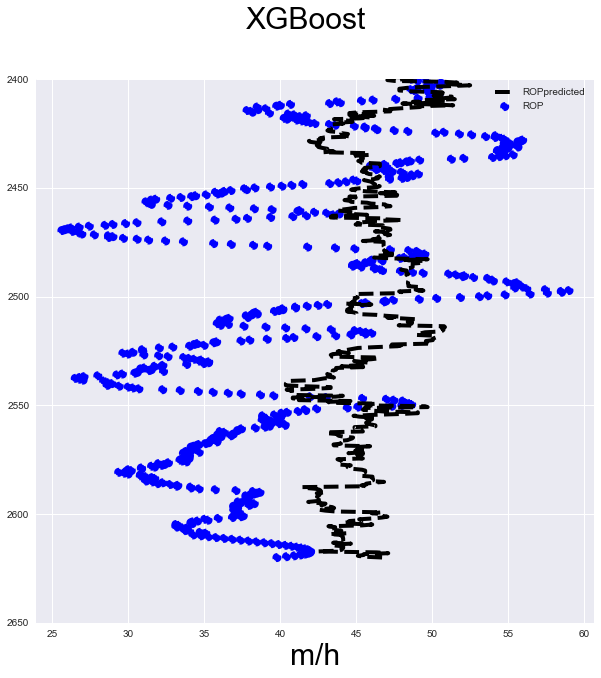

In [47]:
fig, (ax1) = plt.subplots(1,1,figsize=(10, 10))
fig.suptitle('XGBoost',color='black',size=30)
ax1.scatter(y_test,depth, color="blue", label=r"ROP",linewidth=2,linestyle = '--')
ax1.legend(loc="best")
ax1.set_ylim(2650,2400)
ax1.set_xlabel(r'm/h',color='black',size=30)
ax1.plot(preds,depth, color="black", label=r"ROPpredicted",linewidth=4,linestyle = '--')
ax1.legend(loc="best")

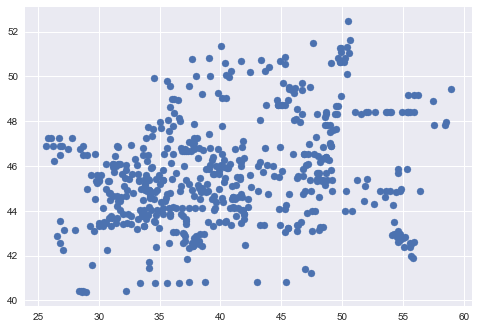

In [48]:
plt.scatter(y_test,preds)

In [49]:
r2_score(y_test,preds)

-0.3622739048180703

## Нейронная сеть

In [50]:
XZ

,Обороты ротора\СВП,Общий объём ёмкостей,Плотность на входе,WOB kH,delivery pressure,Flow out,Weight of drill string kg,Torque
0,26.979,77.834,1180.000,27.093,469.744,0.029,146047.969,0.695
1,27.220,77.342,1180.000,27.089,465.592,0.030,146407.045,0.724
2,27.120,77.346,1180.000,27.086,461.785,0.030,146720.759,0.751
3,27.105,76.973,1180.000,27.082,458.312,0.030,146990.843,0.776
4,26.767,76.919,1180.000,27.079,455.160,0.030,147219.028,0.800
...,...,...,...,...,...,...,...,...
5579,62.280,83.055,1120.000,62.112,17002.709,0.018,421685.950,13.758
5580,61.675,83.869,1120.000,62.097,16983.292,0.018,421685.950,13.734
5581,62.091,83.973,1120.000,62.081,16959.838,0.018,421685.950,13.701
5582,62.313,84.855,1120.000,62.062,16932.201,0.018,421685.950,13.660


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
standartscaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(XZ, ROP , train_size = 0.85, shuffle =False)
x_train =standartscaler.fit_transform(x_train)
x_test =standartscaler.transform(x_test)
print(x_train.shape, x_test.shape)

(4746, 8) (838, 8)


In [52]:
# import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import metrics
def build_model():
  model = keras.Sequential([
    layers.Dense(50, activation='softmax', input_shape=(8,)),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam()

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse', tf.keras.metrics.RootMeanSquaredError(),'acc'])
  return model

In [53]:
model = build_model()

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(x_train, y_train,
          batch_size=300, epochs=200,
          validation_data=(x_test, y_test), verbose = 1,
          shuffle=False)

Epoch 1/200
16/16 [==============================] - 0s 15ms/step - loss: 7716.8486 - mse: 7716.8486 - root_mean_squared_error: 87.8456 - acc: 0.0000e+00 - val_loss: 1910.4302 - val_mse: 1910.4302 - val_root_mean_squared_error: 43.7085 - val_acc: 0.0000e+00
Epoch 2/200
16/16 [==============================] - 0s 3ms/step - loss: 7712.1299 - mse: 7712.1299 - root_mean_squared_error: 87.8187 - acc: 0.0000e+00 - val_loss: 1907.9767 - val_mse: 1907.9767 - val_root_mean_squared_error: 43.6804 - val_acc: 0.0000e+00
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 7707.5981 - mse: 7707.5981 - root_mean_squared_error: 87.7929 - acc: 0.0000e+00 - val_loss: 1905.4624 - val_mse: 1905.4624 - val_root_mean_squared_error: 43.6516 - val_acc: 0.0000e+00
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 7703.0332 - mse: 7703.0342 - root_mean_squared_error: 87.7669 - acc: 0.0000e+00 - val_loss: 1902.9297 - val_mse: 1902.9297 - val_root_mean_squared_error: 4

Epoch 64/200
16/16 [==============================] - 0s 3ms/step - loss: 7403.6030 - mse: 7403.6030 - root_mean_squared_error: 86.0442 - acc: 0.0000e+00 - val_loss: 1723.0256 - val_mse: 1723.0256 - val_root_mean_squared_error: 41.5093 - val_acc: 0.0000e+00
Epoch 65/200
16/16 [==============================] - 0s 4ms/step - loss: 7398.8262 - mse: 7398.8262 - root_mean_squared_error: 86.0164 - acc: 0.0000e+00 - val_loss: 1720.1350 - val_mse: 1720.1350 - val_root_mean_squared_error: 41.4745 - val_acc: 0.0000e+00
Epoch 66/200
16/16 [==============================] - 0s 3ms/step - loss: 7394.0879 - mse: 7394.0884 - root_mean_squared_error: 85.9889 - acc: 0.0000e+00 - val_loss: 1717.2861 - val_mse: 1717.2861 - val_root_mean_squared_error: 41.4402 - val_acc: 0.0000e+00
Epoch 67/200
16/16 [==============================] - 0s 3ms/step - loss: 7389.3872 - mse: 7389.3872 - root_mean_squared_error: 85.9615 - acc: 0.0000e+00 - val_loss: 1714.4757 - val_mse: 1714.4757 - val_root_mean_squared_error

Epoch 96/200
16/16 [==============================] - 0s 4ms/step - loss: 7264.7861 - mse: 7264.7861 - root_mean_squared_error: 85.2337 - acc: 0.0000e+00 - val_loss: 1642.5073 - val_mse: 1642.5073 - val_root_mean_squared_error: 40.5279 - val_acc: 0.0000e+00
Epoch 97/200
16/16 [==============================] - 0s 3ms/step - loss: 7260.7778 - mse: 7260.7778 - root_mean_squared_error: 85.2102 - acc: 0.0000e+00 - val_loss: 1640.2225 - val_mse: 1640.2225 - val_root_mean_squared_error: 40.4997 - val_acc: 0.0000e+00
Epoch 98/200
16/16 [==============================] - 0s 3ms/step - loss: 7256.7837 - mse: 7256.7837 - root_mean_squared_error: 85.1868 - acc: 0.0000e+00 - val_loss: 1637.9463 - val_mse: 1637.9463 - val_root_mean_squared_error: 40.4715 - val_acc: 0.0000e+00
Epoch 99/200
16/16 [==============================] - 0s 3ms/step - loss: 7252.8042 - mse: 7252.8042 - root_mean_squared_error: 85.1634 - acc: 0.0000e+00 - val_loss: 1635.6781 - val_mse: 1635.6781 - val_root_mean_squared_error

Epoch 159/200
16/16 [==============================] - 0s 3ms/step - loss: 7030.7378 - mse: 7030.7378 - root_mean_squared_error: 83.8495 - acc: 0.0000e+00 - val_loss: 1509.1688 - val_mse: 1509.1688 - val_root_mean_squared_error: 38.8480 - val_acc: 0.0000e+00
Epoch 160/200
16/16 [==============================] - 0s 3ms/step - loss: 7027.2266 - mse: 7027.2266 - root_mean_squared_error: 83.8286 - acc: 0.0000e+00 - val_loss: 1507.1708 - val_mse: 1507.1708 - val_root_mean_squared_error: 38.8223 - val_acc: 0.0000e+00
Epoch 161/200
16/16 [==============================] - 0s 4ms/step - loss: 7023.7207 - mse: 7023.7207 - root_mean_squared_error: 83.8076 - acc: 0.0000e+00 - val_loss: 1505.1755 - val_mse: 1505.1755 - val_root_mean_squared_error: 38.7966 - val_acc: 0.0000e+00
Epoch 162/200
16/16 [==============================] - 0s 4ms/step - loss: 7020.2202 - mse: 7020.2202 - root_mean_squared_error: 83.7868 - acc: 0.0000e+00 - val_loss: 1503.1829 - val_mse: 1503.1829 - val_root_mean_squared_e

Epoch 191/200
16/16 [==============================] - 0s 3ms/step - loss: 6920.2725 - mse: 6920.2725 - root_mean_squared_error: 83.1882 - acc: 0.0000e+00 - val_loss: 1446.4624 - val_mse: 1446.4624 - val_root_mean_squared_error: 38.0324 - val_acc: 0.0000e+00
Epoch 192/200
16/16 [==============================] - 0s 3ms/step - loss: 6916.8740 - mse: 6916.8740 - root_mean_squared_error: 83.1677 - acc: 0.0000e+00 - val_loss: 1444.5405 - val_mse: 1444.5405 - val_root_mean_squared_error: 38.0071 - val_acc: 0.0000e+00
Epoch 193/200
16/16 [==============================] - 0s 3ms/step - loss: 6913.4810 - mse: 6913.4810 - root_mean_squared_error: 83.1473 - acc: 0.0000e+00 - val_loss: 1442.6207 - val_mse: 1442.6207 - val_root_mean_squared_error: 37.9818 - val_acc: 0.0000e+00
Epoch 194/200
16/16 [==============================] - 0s 3ms/step - loss: 6910.0894 - mse: 6910.0894 - root_mean_squared_error: 83.1269 - acc: 0.0000e+00 - val_loss: 1440.7030 - val_mse: 1440.7030 - val_root_mean_squared_e

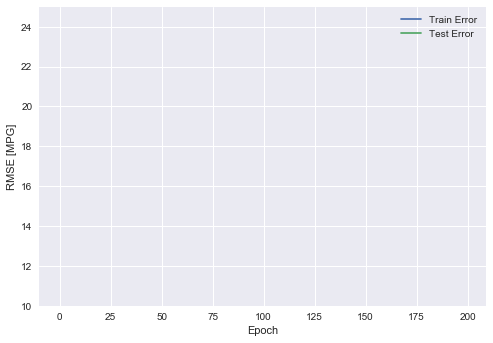

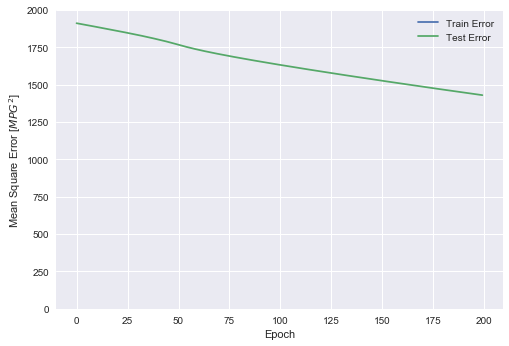

In [56]:
 def plot_history(history):
        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch
        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch

        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('RMSE [MPG]')
        plt.plot(hist['epoch'], hist['root_mean_squared_error'],
                   label='Train Error')
        plt.plot(hist['epoch'], hist['val_root_mean_squared_error'],
                   label = 'Test Error')
        plt.ylim([10,25])
        plt.legend()

        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('Mean Square Error [$MPG^2$]')
        plt.plot(hist['epoch'], hist['mse'],
                   label='Train Error')
        plt.plot(hist['epoch'], hist['val_mse'],
                   label = 'Test Error')
        plt.ylim([0,2000])
        plt.legend()
        plt.show()
       
  


plot_history(history)

In [57]:
Roppredicted = model.predict(x_test)
depth = log.iloc[4746:,0]
depth.shape
print(Roppredicted[:,0],Roppredicted.shape,depth.shape)

[6.0442653 6.044691  6.0447397 6.044491  6.044606  6.044161  6.0442047
 6.044035  6.0442734 6.0439653 6.044414  6.0444164 6.044362  6.0443487
 6.044033  6.043838  6.043439  6.0431876 6.043461  6.0435953 6.0413637
 6.0411305 6.0419803 6.0417814 6.0413084 6.0410595 6.0410976 6.0403795
 6.039199  6.039319  6.039339  6.039317  6.039153  6.039252  6.039912
 6.0403423 6.0396523 6.0393305 6.0381975 6.038987  6.03932   6.038937
 6.0386314 6.0378704 6.038461  6.0383353 6.0376368 6.0386515 6.0396824
 6.040222  6.0404263 6.0389566 6.038884  6.0388484 6.0389557 6.0386515
 6.039317  6.0406895 6.041008  6.040679  6.0400286 6.0396085 6.0393963
 6.038848  6.038966  6.039406  6.040134  6.0411158 6.04134   6.041446
 6.0408263 6.0403566 6.040266  6.0405874 6.040799  6.0414996 6.0423517
 6.041745  6.041614  6.0411663 6.0409245 6.0408936 6.0434384 6.0431747
 6.0426216 6.0425506 6.042287  6.042207  6.0422926 6.0430317 6.0433655
 6.0429344 6.0426803 6.04257   6.042455  6.042326  6.041483  6.0412865
 6.042457

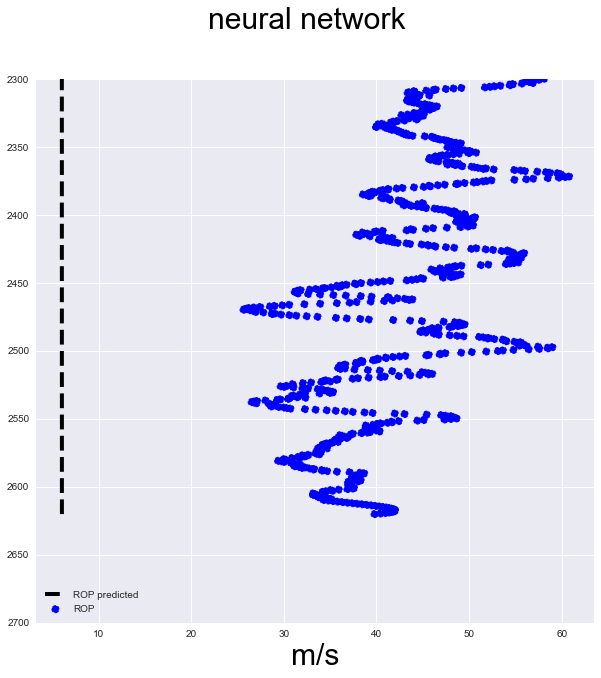

In [58]:
fig, (ax1) = plt.subplots(1,1,figsize=(10, 10))
fig.suptitle('neural network',color='black',size=30)
ax1.plot(Roppredicted,depth, color="black", label=r"ROP predicted",linewidth=4,linestyle = '--')
ax1.legend(loc="best")
ax1.set_ylim(2700,2300)
ax1.set_xlabel(r'm/s',color='black',size=30)
ax1.scatter(y_test,depth, color="blue", label=r"ROP",linewidth=1,linestyle = '--')
ax1.legend(loc="best")

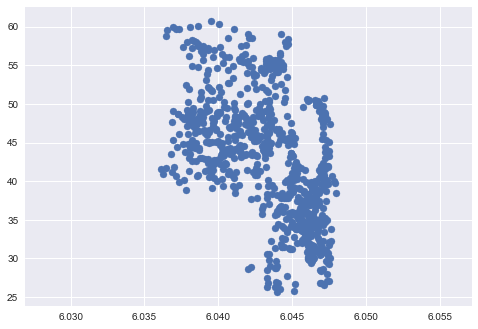

In [59]:
plt.scatter(Roppredicted,y_test)


In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(y_test,Roppredicted)

-21.637425247415003

In [62]:
XZ.shape[0]

5584

### LSTM regression

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import sklearn.cluster
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import mixture
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow import optimizers
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape, Lambda, GRU, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [64]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data.iloc[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data.iloc[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    x_array =np.reshape(x_array, (x_array.shape[0], x_array.shape[1], 1))
    y_array = np.array(y)
    return x_array, y_array

In [65]:
timestep = 4

In [66]:
robust_data.shape

(5584, 8)

In [67]:
ROP.shape

(5584,)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(robust_data, ROP, test_size=0.1, random_state=123, shuffle = False)
y_test.shape
print(X_train.shape,X_test.shape)

(5025, 8) (559, 8)


In [69]:
print(y_train.shape,y_test.shape)

(5025,) (559,)


In [70]:
x_series = [X_train[i:i+timestep, :] for i in range(1, X_train.shape[0] - timestep)]
y_series = [y_train[i+timestep] for i in range(y_train.shape[0] - timestep - 1)]
x = np.array(x_series)
y = np.array(y_series)
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (5020, 4, 8)
y shape: (5020,)


In [71]:

x_series1 = [X_test[i:i+timestep, :] for i in range(1, X_test.shape[0] - timestep)]
y_series1 = [y_test[i+timestep] for i in range(y_test.shape[0] - timestep - 1)]
x1 = np.array(x_series1)
y1 = np.array(y_series1)
print(f"x1 shape: {x1.shape}")
print(f"y1 shape: {y1.shape}")

x1 shape: (554, 4, 8)
y1 shape: (554,)


In [72]:
robust = RobustScaler()


In [80]:
regressor = Sequential()
regressor.add(LSTM(units=25, input_shape=(timestep,8)))
regressor.add(Dense(8 * 2, activation='relu'))
regressor.add(Reshape((8, 2)))
# regressor.add(Lambda(lambda x: softmax(x, axis=-1)))
regressor.add(Dense(2, activation='softmax'))
regressor.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['mean_squared_error'])
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 25)                3400      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                416       
_________________________________________________________________
reshape_4 (Reshape)          (None, 8, 2)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 8, 2)              6         
Total params: 3,822
Trainable params: 3,822
Non-trainable params: 0
_________________________________________________________________


In [81]:
# result = regressor.fit_generator(train_gen, steps_per_epoch=len(train_gen), epochs=1000)
result = regressor.fit(x, y, epochs=100,batch_size=32, validation_data=(x1, y1), callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=10),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_acc', save_best_only=True)])

Epoch 1/100


InvalidArgumentError:  Incompatible shapes: [32,1] vs. [32,8,2]
	 [[node SquaredDifference (defined at <ipython-input-81-2bf0c68b8a1c>:3) ]] [Op:__inference_train_function_31681]

Function call stack:
train_function


In [ ]:
 # ModelCheckpoint(filepath='best_model1.h5', monitor='val_acc', save_best_only=True)])